In [1]:
from DHR import DHR
from torch.utils.data import DataLoader
from Unet_architecture import UNet, hair_dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import torch
import gc


In [2]:
train_images_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/train/original_images/"
train_mask_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/train/mask/"

val_images_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/val/original_images/"
val_mask_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/val/mask/"

test_images_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/test/original_images/"
test_mask_path = "D:/DOWNLOAD/DIGITAL HAIR DATASET/test/mask/"

train_dataset = hair_dataset(images_dir=train_images_path,masks_dir=train_mask_path)
val_dataset = hair_dataset(images_dir=val_images_path,masks_dir=val_mask_path)
test_dataset = hair_dataset(images_dir=test_images_path,masks_dir=test_mask_path)


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet()
Unet_checkpoint_dir ='checkpoints/final_model.pt'
model.load_state_dict(torch.load(Unet_checkpoint_dir))
model.to(device=device)


UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [4]:
batch_size = 1

train_data = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False)
val_data = DataLoader(dataset=val_dataset,batch_size=batch_size,shuffle=False)
test_data = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)


In [5]:
with torch.no_grad():
    
    train_acc = 0
    
    for batch in tqdm(train_data):

        images, true_masks = batch['images'], batch['masks']
        images = images.to(device=device)
        true_masks = true_masks.to(device=device)

        masks_pred = model(images)
        acc = cv2.absdiff(masks_pred.squeeze(1).cpu().detach().numpy(),true_masks.cpu().detach().numpy()).mean()
        train_acc += acc

        gc.collect()
        torch.cuda.empty_cache()

train_acc = 100-(train_acc*100/80)
print(train_acc)


100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

97.12015164957847


In [6]:
with torch.no_grad():
    
    val_acc = 0
    
    for batch in tqdm(val_data):

        images, true_masks = batch['images'], batch['masks']
        images = images.to(device=device)
        true_masks = true_masks.to(device=device)

        masks_pred = model(images)
        acc = cv2.absdiff(masks_pred.squeeze(1).cpu().detach().numpy(),true_masks.cpu().detach().numpy()).mean()
        val_acc += acc

        gc.collect()
        torch.cuda.empty_cache()

val_acc = 100-(val_acc*100/20)
print(val_acc)


100%|██████████| 20/20 [00:04<00:00,  4.54it/s]

97.51951252110302


In [7]:
with torch.no_grad():
    
    test_acc = 0
    
    for batch in tqdm(test_data):

        images, true_masks = batch['images'], batch['masks']
        images = images.to(device=device)
        true_masks = true_masks.to(device=device)

        masks_pred = model(images)
        acc = cv2.absdiff(masks_pred.squeeze(1).cpu().detach().numpy(),true_masks.cpu().detach().numpy()).mean()
        test_acc += acc

        gc.collect()
        torch.cuda.empty_cache()

test_acc = 100-(test_acc*100/206)
print(test_acc)


100%|██████████| 206/206 [00:42<00:00,  4.81it/s]

95.4835452955415


In [ ]:
image = cv2.imread("D:/DOWNLOAD/DIGITAL HAIR DATASET/test/original_images/ISIC_0011360.png")
inpainted_image = DHR(image,upper_bound=4,checkpoint='checkpoints/final_model.pt',output_path='',save=False)

plt.figure(1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.figure(2)
plt.imshow(cv2.cvtColor(inpainted_image,cv2.COLOR_BGR2RGB))


---------------------------------- APP CONFIG ----------------------------------
num_gpus_per_job: 1
num_cpus_per_job: 4
num_hosts_per_job: 1
memory_per_job: 32
gpu_type: nvidia-tesla-p100
name: places2_gated_conv_v100
model_restore: 
dataset: celebahq
random_crop: False
val: False
log_dir: logs/full_model_celeba_hq_256
gan: sngan
gan_loss_alpha: 1
gan_with_mask: True
discounted_mask: True
random_seed: False
padding: SAME
train_spe: 4000
max_iters: 100000000
viz_max_out: 10
val_psteps: 2000
data_flist: 
  celebahq: ['data/celeba_hq/train_shuffled.flist', 'data/celeba_hq/validation_static_view.flist']
  celeba: ['data/celeba/train_shuffled.flist', 'data/celeba/validation_static_view.flist']
  places2: ['data/places2/train_shuffled.flist', 'data/places2/validation_static_view.flist']
  imagenet: ['data/imagenet/train_shuffled.flist', 'data/imagenet/validation_static_view.flist']
static_view_size: 30
img_shapes: [256, 256, 3]
height: 128
width: 128
max_delta_height: 32
max_delta_width: 32

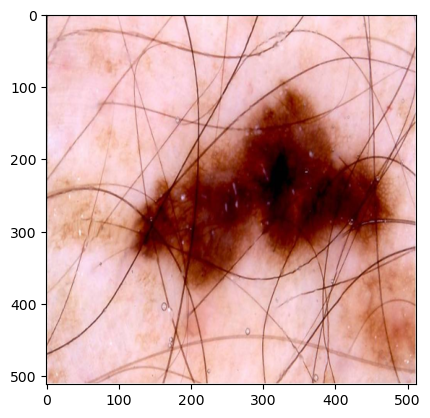

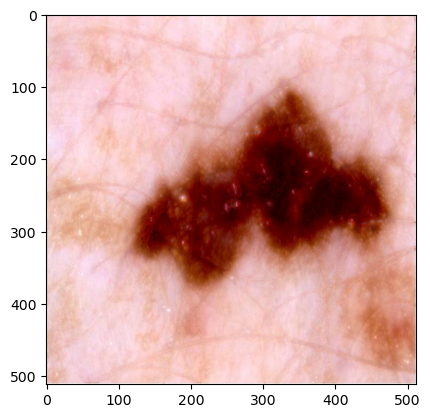

In [9]:
image = cv2.imread("D:/DOWNLOAD/DIGITAL HAIR DATASET/test/original_images/ISIC_0000214.png")
inpainted_image = DHR(image,upper_bound=4,checkpoint='checkpoints/final_model.pt',output_path='',save=False)

plt.figure(3)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.figure(4)
plt.imshow(cv2.cvtColor(inpainted_image,cv2.COLOR_BGR2RGB))


---------------------------------- APP CONFIG ----------------------------------
num_gpus_per_job: 1
num_cpus_per_job: 4
num_hosts_per_job: 1
memory_per_job: 32
gpu_type: nvidia-tesla-p100
name: places2_gated_conv_v100
model_restore: 
dataset: celebahq
random_crop: False
val: False
log_dir: logs/full_model_celeba_hq_256
gan: sngan
gan_loss_alpha: 1
gan_with_mask: True
discounted_mask: True
random_seed: False
padding: SAME
train_spe: 4000
max_iters: 100000000
viz_max_out: 10
val_psteps: 2000
data_flist: 
  celebahq: ['data/celeba_hq/train_shuffled.flist', 'data/celeba_hq/validation_static_view.flist']
  celeba: ['data/celeba/train_shuffled.flist', 'data/celeba/validation_static_view.flist']
  places2: ['data/places2/train_shuffled.flist', 'data/places2/validation_static_view.flist']
  imagenet: ['data/imagenet/train_shuffled.flist', 'data/imagenet/validation_static_view.flist']
static_view_size: 30
img_shapes: [256, 256, 3]
height: 128
width: 128
max_delta_height: 32
max_delta_width: 32

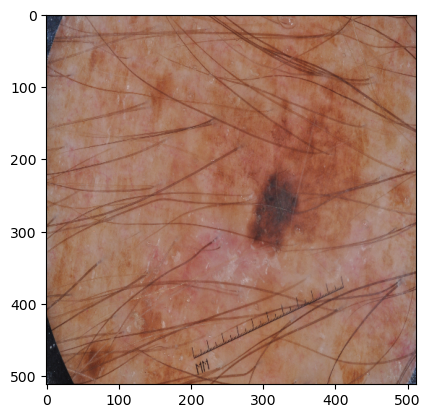

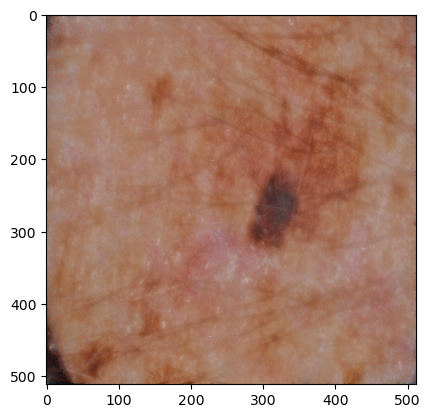

In [10]:
image = cv2.imread("D:/DOWNLOAD/DIGITAL HAIR DATASET/test/original_images/ISIC_0014542.png")
inpainted_image = DHR(image,upper_bound=4,checkpoint='checkpoints/final_model.pt',output_path='',save=False)

plt.figure(5)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.figure(6)
plt.imshow(cv2.cvtColor(inpainted_image,cv2.COLOR_BGR2RGB))


---------------------------------- APP CONFIG ----------------------------------
num_gpus_per_job: 1
num_cpus_per_job: 4
num_hosts_per_job: 1
memory_per_job: 32
gpu_type: nvidia-tesla-p100
name: places2_gated_conv_v100
model_restore: 
dataset: celebahq
random_crop: False
val: False
log_dir: logs/full_model_celeba_hq_256
gan: sngan
gan_loss_alpha: 1
gan_with_mask: True
discounted_mask: True
random_seed: False
padding: SAME
train_spe: 4000
max_iters: 100000000
viz_max_out: 10
val_psteps: 2000
data_flist: 
  celebahq: ['data/celeba_hq/train_shuffled.flist', 'data/celeba_hq/validation_static_view.flist']
  celeba: ['data/celeba/train_shuffled.flist', 'data/celeba/validation_static_view.flist']
  places2: ['data/places2/train_shuffled.flist', 'data/places2/validation_static_view.flist']
  imagenet: ['data/imagenet/train_shuffled.flist', 'data/imagenet/validation_static_view.flist']
static_view_size: 30
img_shapes: [256, 256, 3]
height: 128
width: 128
max_delta_height: 32
max_delta_width: 32

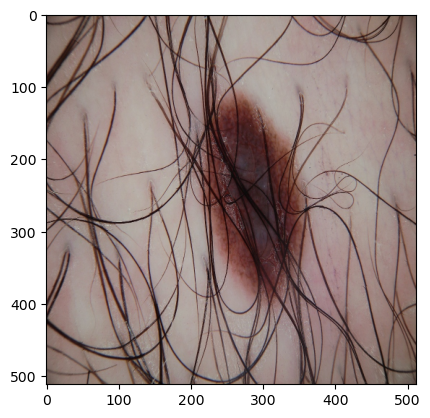

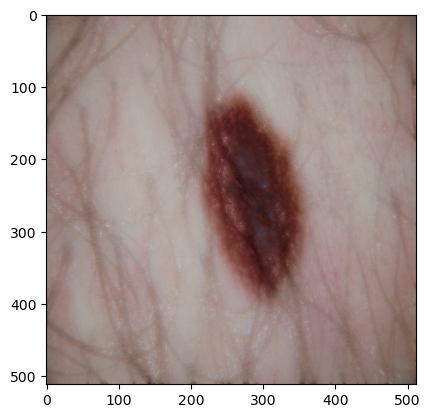

In [11]:
image = cv2.imread("D:/DOWNLOAD/DIGITAL HAIR DATASET/test/original_images/ISIC_0009944.png")
inpainted_image = DHR(image,upper_bound=6,checkpoint='checkpoints/final_model.pt',output_path='',save=False)

plt.figure(7)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.figure(8)
plt.imshow(cv2.cvtColor(inpainted_image,cv2.COLOR_BGR2RGB))
